In [1]:
%load_ext watermark
%watermark

2019-05-25T11:36:39+02:00

CPython 3.6.5
IPython 6.4.0

compiler   : GCC 7.2.0
system     : Linux
release    : 5.1.2-arch1-1-ARCH
machine    : x86_64
processor  : 
CPU cores  : 4
interpreter: 64bit


# Regresion logistica

## Teoría

### Variables Categóricas.
Como hemos estudidado anteriormente, el aprendizaje en machine Learning se divide en aprendizaje supervisado y aprendizaje no supervisado. A su vez, el aprendizaje supervisado contempla dos tipos de variables: Las variables continuas y las variables categóricas.

Los problemas de clasificación son muy extensos, desde clasificación de imagenes a la clasificación de carácteres escritos.


### ¿Que es la Regresión Logística?
En estadística, la regresión logística es un tipo de análisis de regresión utilizado para predecir el resultado de una variable categórica (una variable que puede adoptar un número limitado de categorías) en función de las variables independientes o predictoras. Es útil para modelar la probabilidad de un evento ocurriendo como función de otros factores. El análisis de regresión logística se enmarca en el conjunto de Modelos Lineales Generalizados (GLM por sus siglas en inglés) que usa como función de enlace la función logit. Las probabilidades que describen el posible resultado de un único ensayo se modelan, como una función de variables explicativas, utilizando una función logística.

La regresión logística es usada extensamente en las ciencias médicas y sociales. Otros nombres para regresión logística usados en varias áreas de aplicación incluyen modelo logístico, modelo logit, y clasificador de máxima entropía.

La regresión logística se puede utilizar para resolver problemas donde queremos clasificar,ya que la principal diferencia entre la regresión lineal y la logística es que en estas últimas las variables objetivo que trata son probabilidades de una clase (*Clase A o Clase B* o valores booleanos).

![regresion_logistica](../../RESOURCES/funcion_logistica.png)

Esto traduce a esu funcion lineal a una funcion donde el resultado simpre estara en cero.

## Implementacion
### Ingesta de datos

Para este ejemplo vamos a ultilizar el (**Wisconsin Breast Cancer Dataset**). Es un dataset de imagenes de celulas ibtenidas de analisis de personas que sufren un posible cancer de mama.

Las imagenes tiene el siguiente aspecto:

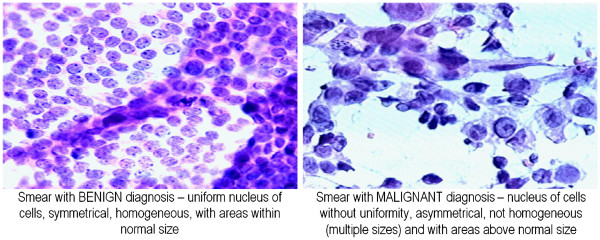

In [2]:
from IPython.display import Image

Image("../../RESOURCES/breast_cancer.jpeg")

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import datasets

In [4]:
cancer_datos = datasets.load_breast_cancer()
cancer_datos.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [5]:
print(cancer_datos["DESCR"])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [6]:
cancer_datos["target"][:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

In [7]:
cancer_datos.target_names

array(['malignant', 'benign'], dtype='<U9')

In [8]:
cancer_df = pd.DataFrame(cancer_datos["data"],
                         columns=cancer_datos["feature_names"])

cancer_df["objetivo"] = cancer_datos.target

El dataset contiene los valores medios de ciertis parametros del núcleo de las celulas mostradas en las iágenes, así como dichos valores para la celula con características más preocupantes

In [9]:
cancer_df.shape

(569, 31)

In [10]:
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,objetivo
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [11]:
cancer_df.objetivo.value_counts(True)

1    0.627417
0    0.372583
Name: objetivo, dtype: float64

## Implementación
### Predicción de los datos mediante regresión lineal

Vamos a intentar predecir resultados en función al dataset anteriormente cargado mediante regresión lineal, donde demostraremos que los resultados no se encuentran entre los posibles valores *0 y 1*


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [13]:
train_df, test_df = train_test_split(cancer_df, test_size=0.4)

variables_entrenamiento = cancer_datos["feature_names"]
variables_objetivo = "objetivo"

Text(0,0.5,'Diagnostico (Maligno|Benigno)')

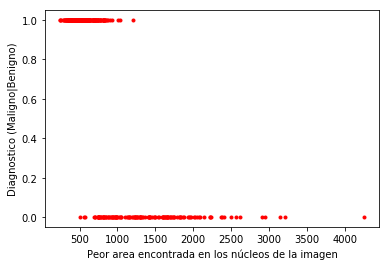

In [14]:
columna_entrenamiento = "worst area"

plt.plot(train_df[columna_entrenamiento], train_df.objetivo, '.r')
plt.xlabel("Peor area encontrada en los núcleos de la imagen")
plt.ylabel("Diagnostico (Maligno|Benigno)")

In [15]:
modelo_ols = LinearRegression()

modelo_ols.fit(train_df[[columna_entrenamiento]],
              train_df[variables_objetivo])

predicciones = modelo_ols.predict(test_df[[columna_entrenamiento]])

predicciones[:10]

array([0.82953169, 0.89478058, 0.35965529, 0.98804493, 0.67951345,
       0.63167631, 0.13794159, 0.09034544, 0.36869253, 0.98569525])

Como hemos observado en las predicciones de Regresión lineal, los resultados predecidos se encuentran más allá de los máximos y mínimos (0 y 1). Si obtenemos un gráfico de esta predicción, veremos más claramente como la linea sale de los margenes de los valores de las clases

Text(0,0.5,'Diagnostico (Maligno|Benigno)')

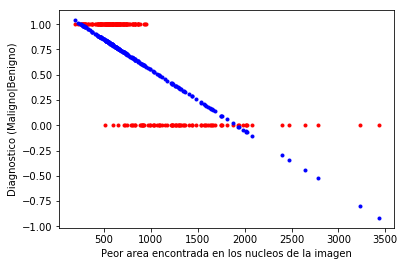

In [16]:
plt.plot(test_df[columna_entrenamiento], test_df.objetivo, '.r')
plt.plot(test_df[columna_entrenamiento], predicciones, '.b')
plt.xlabel("Peor area encontrada en los nucleos de la imagen")
plt.ylabel("Diagnostico (Maligno|Benigno)")

### Aplicación de la función teórica

In [17]:
from ipywidgets import interact

def funcion_logistica(x, L=1, k=1, x0=0):
    return L / (1 + np.exp(-k*(x-x0)))


@interact(L=range(1,10), k=range(-5, 5), x0=range(0,10))
def plot_funcion_logit(L, k, x0):
    x = np.linspace(-5*k, 5*k, 500)
    y = funcion_logistica(x, k=k, L=L, x0=x0)
    plt.figure(1)
    plt.plot(x, y)
#    plt.show()

interactive(children=(Dropdown(description='L', options=(1, 2, 3, 4, 5, 6, 7, 8, 9), value=1), Dropdown(descri…

In [18]:
predicciones_probabilidades = list(map(funcion_logistica, predicciones))

Text(0,0.5,'Diagnostico (Maligno|Beningno)')

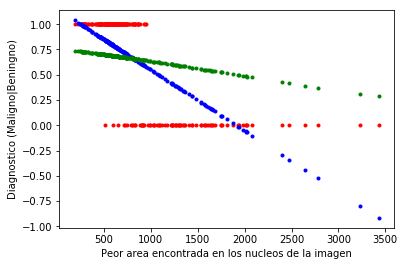

In [19]:
plt.plot(test_df[columna_entrenamiento], test_df.objetivo, '.r')
plt.plot(test_df[columna_entrenamiento], predicciones, '.b')
plt.plot(test_df[columna_entrenamiento], predicciones_probabilidades, '.g')

plt.xlabel("Peor area encontrada en los nucleos de la imagen")
plt.ylabel("Diagnostico (Maligno|Beningno)")

Text(0,0.5,'Diagnostico (Maligno|Beningno)')

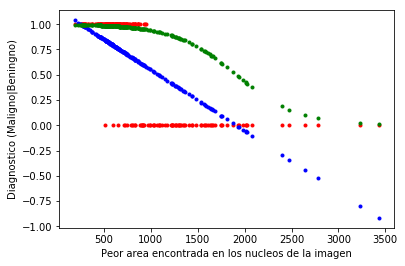

In [20]:
from functools import partial

funcion_logit_k5 = partial(funcion_logistica, k=5)

predicciones_probabilidades = list(map(funcion_logit_k5, predicciones))

plt.plot(test_df[columna_entrenamiento], test_df.objetivo, '.r')
plt.plot(test_df[columna_entrenamiento], predicciones, '.b')
plt.plot(test_df[columna_entrenamiento], predicciones_probabilidades, '.g')

plt.xlabel("Peor area encontrada en los nucleos de la imagen")
plt.ylabel("Diagnostico (Maligno|Beningno)")

### Regresión Logística con Sklearn

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
#Documentacion
LogisticRegression?

Cargamos las variables del dataframe y las ajustamos en datos de entrenamiento y datos de test

In [23]:
X = cancer_df[variables_entrenamiento]
y = cancer_df[variables_objetivo]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

Ajustamos el modelo y predecimos en función a la variable test de X. *clf* es un clasificador que por convención se llaman así al utilizarlos con ScikitLearn. Si observamos el resultado de las predicciones, vemos que ha predecido según la etiqueta objetivo (columna *objetivo* en el dataframe).

In [24]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
predicciones = clf.predict(X_test)

predicciones[:10]

/opt/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([1, 1, 0, 0, 1, 1, 1, 1, 0, 1])

El método *predict_proba* nos da más información de la columna objetivo.El método nos permite obtener la probabilidad de la predicción, ofreciendonos así un coeficiente de la posibilidad de que un cáncer sea maligno o benigno. Esto es muy útil en una aplicación para el mundo real, ya que con el método predict predecimos si el cáncer es maligno o benigno y con el método *predict_proba* podemos ver realmente las posibilidades de que sea maligno o benigno de cara a decirselo a un paciente (sin arriesgarnos a darle una respuesta absoluta y tener la posibilidad de fallar)

In [25]:
predicciones_probabilidades = clf.predict_proba(X_test)
predicciones_probabilidades[:10]

array([[1.72862419e-01, 8.27137581e-01],
       [5.26504196e-02, 9.47349580e-01],
       [9.19425805e-01, 8.05741953e-02],
       [9.98907316e-01, 1.09268440e-03],
       [1.29967240e-02, 9.87003276e-01],
       [3.00258527e-04, 9.99699741e-01],
       [7.02351059e-03, 9.92976489e-01],
       [4.69653887e-02, 9.53034611e-01],
       [9.99947371e-01, 5.26291811e-05],
       [2.55250804e-03, 9.97447492e-01]])

Obtenemos un histograma con las probabilidades de las predicciones realizadas

([array([63.,  4.,  1.,  3.,  2.,  1.,  1.,  0.,  0., 39.]),
  array([39.,  0.,  0.,  1.,  1.,  2.,  3.,  1.,  4., 63.])],
 array([4.47571715e-44, 1.00000000e-01, 2.00000000e-01, 3.00000000e-01,
        4.00000000e-01, 5.00000000e-01, 6.00000000e-01, 7.00000000e-01,
        8.00000000e-01, 9.00000000e-01, 1.00000000e+00]),
 <a list of 2 Lists of Patches objects>)

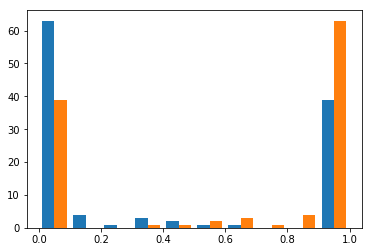

In [26]:
plt.hist(predicciones_probabilidades)

Para exportar y visualizar mejor los resultados, exportamos las predicciones y la probabilidad a un dataframe, organizando las columnas del mismo de la siguiente manera:
- **objetivo**: valor real del dataframe original.
- **rediccion**: valor predecido por el algoritmo.
- 0: posibilidad de que sea cáncer maligno.
- 1: probabilidad de que sea cáncer benigno.

In [27]:
probs_df = pd.DataFrame(predicciones_probabilidades)

In [28]:
X = X_test.reset_index().copy()
X["objetivo"] = y_test.tolist()
X["prediccion"] = predicciones
X = pd.concat([X, probs_df], axis=1)
X[["objetivo","prediccion",0 ,1]].head(10)

,objetivo,prediccion,0,1
0,1,1,0.172862,0.827138
1,1,1,0.052650,0.947350
2,0,0,0.919426,0.080574
3,0,0,0.998907,0.001093
4,1,1,0.012997,0.987003
5,1,1,0.000300,0.999700
6,1,1,0.007024,0.992976
7,1,1,0.046965,0.953035
8,0,0,0.999947,0.000053
9,1,1,0.002553,0.997447


In [30]:
probs_df.to_csv("prediccion_con_regresionLogistica.csv")